# First Step: Import Packages and Load the Dataset

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv('mnist_train.csv', sep = ',', header = None)
test_df = pd.read_csv('mnist_test.csv', sep = ',', header = None)


(10000, 785)

# Second Step: Train The Model

#### 2.1) Prepare the Data 

In [17]:
# Getting only the pixel values (labels are in the 1. column) and normalize them
X_train = train_df.values[:, 1:]/255
y_train = train_df.values[:, 0]

# Same for the testing Dataset
X_test = test_df.values[:, 1:]/255
y_test = test_df.values[:, 0]

# To avoid the model to overfit, we also want to create a validation dataset, which we can use
# during the training process. This helps our model to generalize. We want to validate once and a while
# to gauge if our model is generalizin in the right direction.

# we do this by utilizing the sklearn test-train-split function
from sklearn.model_selection import train_test_split
# Since this function returns muliple values we need to specify multiple variables
# The function needs the Dataset it should split (X_train & y_train), the size of the validation set (20%) 
# and a random seed (in my case 23)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 23)
# print(X_train.shape, y_train.shape, X_validate.shape, y_validate.shape)


# Now we have to take our X_trian, X_val, y_train, y_val and put it in the right form to feed it into
# our deep neural network

# Currently our data is an array format but we need it to be in an 28x28x1 form because we 
# want to apply all the filters and downsampling on the images.

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1)) # we reshape every image array into 28x28x1
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))



#### 2.2) Bulid our Neural Network

In [18]:
import tensorflow as tf
import keras # you may need to install keras fist and restart the kernel (intall: pip install keras)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# We need a sequential model, since we build our entire model in a pipeline fashion
#  #1 fist we use build the convolution layers (filtering or making feature maps)
#  #2 We perform maxPooling
#  #3 We perform a dropout
#  #4 We perform the flattening of our image arrays
#  #5 We feed the flatten array into our network (dense)
#  #6 We optimize the network by adjusting the biases and weights

# Our model object
cnn_model = Sequential()

#### Fist Step: CONVOLUTION
# our fist step is to perform the convolution, here we specify how many kernels we use and which size
# they should have (in our case 32 kernels with a shape of 3x3).
# We also need to specify the input shape of our model (28x28x1)
# We also specify our internal activation function (relu, since we want to preserve the gradient)
cnn_model.add(Conv2D(32,3,3, input_shape = (28, 28, 1), activation = 'relu'))

#### Second Step: MAX POOLING
# Here we need to specify our pool size (size of the pooling window)
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

#### Third Step: FLATTENING
# Here we take our 28x28 image and flatten it, so that it gets the shape of (784,1) -> perfect input form
cnn_model.add(Flatten())

#### Fourth Step: ARCHITECTING THE ANN
# frist we specify our hidden layer (100 Neurons and relu AF)
# Second we specify our output layer (10 Neurons and sigmoid AF)
cnn_model.add(Dense(output_dim = 100, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

C:\Users\petar\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
C:\Users\petar\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100)`
C:\Users\petar\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


#### 2.3) Train The Model 

In [19]:
# In order to train our model we use the adam optimizer 
# Our KPI will be the accuracy of our prediction
# Our Loss-Function will be sparse_categorial_crossentropy since we are categorizing the images

lr = 0.001
epochs = 50

cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr = lr), metrics = ['accuracy'] )

# After we compiled our model we want to FIT it on our custom data and store the training history for later plots
history = cnn_model.fit(X_train, 
              y_train, 
              batch_size = 512, # size of a batch after the weights are getting updated (use 512 images)
              nb_epoch = epochs, 
              verbose = 1, # shows you a progess bar during training (0 = shows nothing, 2 = epoch num)
              validation_data = (X_validate, y_validate))


C:\Users\petar\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 11s 220us/step - loss: 0.5242 - acc: 0.8730 - val_loss: 0.2166 - val_acc: 0.9381
Epoch 2/50
48000/48000 [==============================] - 10s 198us/step - loss: 0.1700 - acc: 0.9521 - val_loss: 0.1362 - val_acc: 0.9613
Epoch 3/50
48000/48000 [==============================] - 10s 204us/step - loss: 0.1120 - acc: 0.9690 - val_loss: 0.1031 - val_acc: 0.9714
Epoch 4/50
48000/48000 [==============================] - 10s 216us/step - loss: 0.0842 - acc: 0.9760 - val_loss: 0.0884 - val_acc: 0.9752
Epoch 5/50
48000/48000 [==============================] - 10s 210us/step - loss: 0.0670 - acc: 0.9810 - val_loss: 0.0785 - val_acc: 0.9774
Epoch 6/50
48000/48000 [==============================] - 10s 217us/step - loss: 0.0568 - acc: 0.9840 - val_loss: 0.0717 - val_acc: 0.9797
Epoch 7/50
48000/48000 [==============================] - 10s 217us/step - loss: 0.0496 - acc: 0.9861 - val_loss: 0.

# Third Step: Evaluate Our Model

#### 1) Plot of Accuracy and Loss During Training

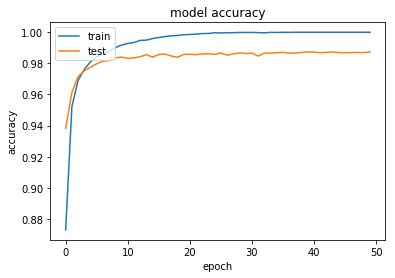

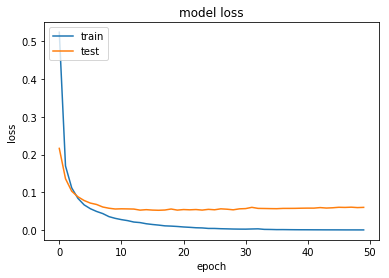

In [20]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3.2) Performing the Evaluation

10000/10000 [==============================] - 1s 84us/step
Test Accuracy: 0.986 


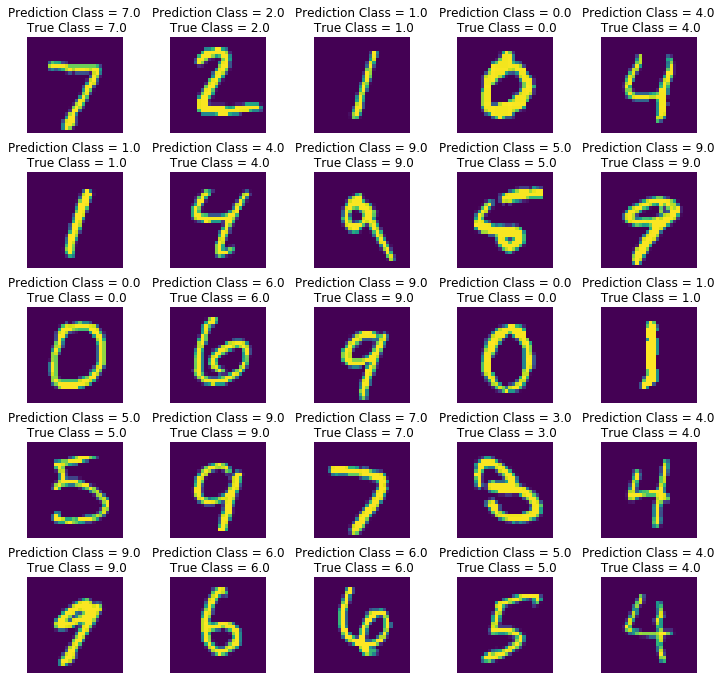

In [29]:
# we want to evaluate our model on our test data (data, the model never saw before)
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f} '.format(evaluation[1]))

# Lets print a cross validation matrix
# An array with the classes our model predicted
predicted_classes = cnn_model.predict_classes(X_test)

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape((28, 28)))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)